### <center>Dataset Attributes</center>
    
- **V1 - V28** : Numerical features that are a result of PCA transformation.
               : Fitur numerik yang dihasilkan melalui transformasi menggunakan metode PCA

- **Time** : Seconds elapsed between each transaction and the 1st transaction.
           : Waktu dalam detik yang lewat antara setiap transaksi dan transaksi pertama.  

- **Amount** : Transaction amount.
             : Jumlah Transaksi

- **Class** : Fraud or otherwise (1 or 0)
            : Kategori transaksi, apakah fraud (penipuan) atau tidak (0 untuk tidak fraud, 1 untuk fraud)

###  Contents | Konten :
- Dataset Information
- Exploratory Data Analysis
- Feature Selection
- Data Balancing
- Modeling
- Conclusion


# <center><div style="font-family: Trebuchet MS; background-color: #00000; color: #545955; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import Library & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("creditcard.csv")


### Exploratory Data Analysis

In [4]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape


(284807, 31)

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.isnull()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fraud_percentage = len(data[data['Class'] == 1]) / len(data) * 100
nofraud_percentage = len(data[data['Class'] == 0]) / len(data) * 100
percentages = [nofraud_percentage, fraud_percentage]

colors = ['#ff9999', '#66b3ff']

pie_chart = go.Pie(labels=['No Fraud', 'Fraud'], values=percentages,
                   marker=dict(colors=colors, line=dict(color='black', width=1)),
                   textinfo='label+percent', insidetextorientation='radial')

fraud_counts = data['Class'].value_counts().reset_index()
fraud_counts.columns = ['Class', 'Count']
bar_chart = go.Bar(x=fraud_counts['Class'], y=fraud_counts['Count'],
                   marker=dict(color=colors), text=fraud_counts['Count'], textposition='outside')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Pie Chart", "Bar Chart"),
                    specs=[[{"type": "domain"}, {"type": "xy"}]])

fig.add_trace(pie_chart, row=1, col=1)
fig.add_trace(bar_chart, row=1, col=2)

fig.update_layout(title_text="Fraud Detection Analysis",
                  annotations=[
                      dict(text='Pie Chart', x=0.18, y=1.1, font_size=20, showarrow=False),
                      dict(text='Bar Chart', x=0.82, y=1.1, font_size=20, showarrow=False)
                  ],
                  showlegend=False)

fig.show()


- The data show that the class highly unbalanced with **No Fraud** class take as a majority
- Data yang disajikan menampilkan kelas dengan **No Fraud** sebagai kelas mayoritas terbanyak

- We need to balance the data to avoid the bias prediction
- data perlu diseimbangkan untuk menghindari bias dalam prediksi


# <center><div style="font-family: Trebuchet MS; background-color: #00000; color: #545955; padding: 12px; line-height: 1;">Feature Selection</div></center>

In [12]:
import plotly.graph_objects as go

corr_matrix = data.corr()

heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation'),
    zmin=-1,
    zmax=1
)

fig = go.Figure(data=heatmap)

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickangle=-45)
)

fig.show()


In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate the correlation with the 'Class' column
corr = data.corrwith(data['Class']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']

# Split the correlation DataFrame into two parts for visualization
corr_part1 = corr.iloc[:15, :]
corr_part2 = corr.iloc[15:30, :]

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Part 1", "Part 2"),
                    specs=[[{"type": "heatmap"}, {"type": "heatmap"}]])

# Add heatmaps to the subplots
heatmap_part1 = go.Heatmap(
    z=corr_part1.T.values,  # Transpose for correct orientation
    x=corr_part1.index,
    y=corr_part1.columns,
    colorscale='Viridis',  # You can use any colorscale you prefer
    colorbar=dict(title='Correlation'),
    zmin=-1,
    zmax=1,
    showscale=False  # Hide colorbar for individual heatmaps, controlled globally
)

heatmap_part2 = go.Heatmap(
    z=corr_part2.T.values,  # Transpose for correct orientation
    x=corr_part2.index,
    y=corr_part2.columns,
    colorscale='Viridis',  # You can use any colorscale you prefer
    colorbar=dict(title='Correlation'),
    zmin=-1,
    zmax=1,
    showscale=False  # Hide colorbar for individual heatmaps, controlled globally
)

fig.add_trace(heatmap_part1, row=1, col=1)
fig.add_trace(heatmap_part2, row=1, col=2)

# Update layout
fig.update_layout(
    title='Correlation with Target Feature',
    xaxis_title='Features',
    yaxis_title='Correlation',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels if needed
    showlegend=False
)

# Show the plot
fig.show()


- According to the correlation between feature and class, V4, V11 are positively correlated with the class and V7, V3, V16, V10, V12, V14 are negatively correlated with the Class feature.

- Berdasarkan hasil plot korelasi antara fitur dengan kelas, V4 dan V11 merupakan kelas dengan korelasi kuat, sedangkan V7, V3, V16, V10, V12, V14 memiliki korelasi yang negatif atau lemah terhadap kelas

### Uji Anova

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

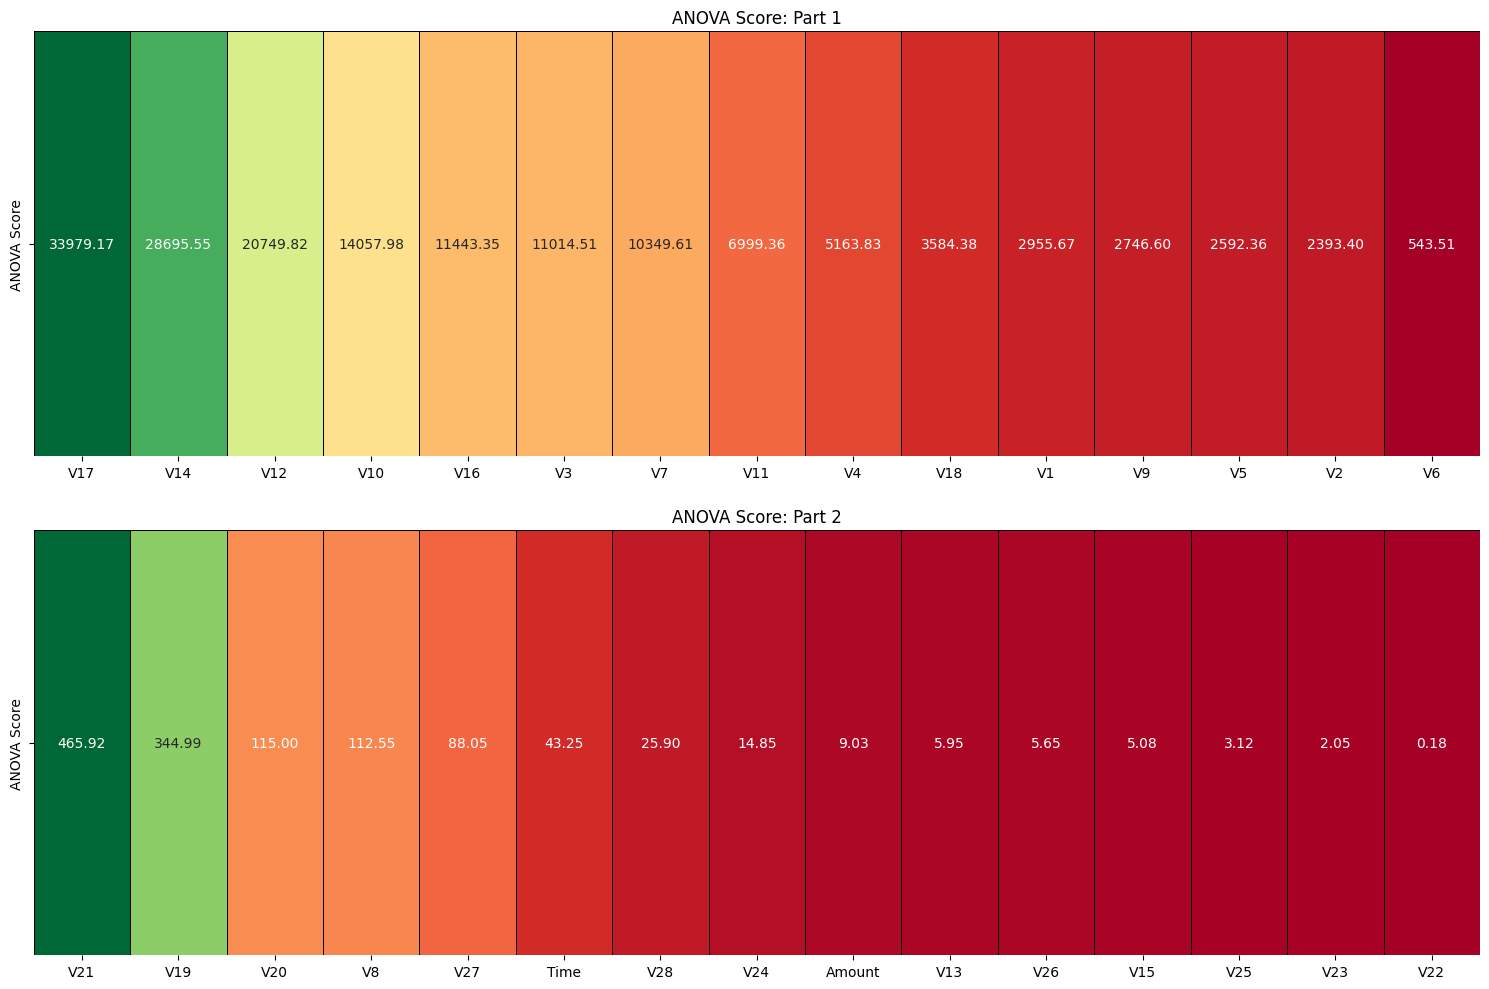

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'data' is already defined
features = data.loc[:, :'Amount']
target = data.loc[:, 'Class']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])
featureScores = featureScores.sort_values(ascending=False, by='ANOVA Score')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))  # Adjusted to make the plot horizontal

plt.subplot(2, 1, 1)
sns.heatmap(featureScores.iloc[:15, :].T, annot=True, cmap='RdYlGn', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA Score: Part 1')

plt.subplot(2, 1, 2)
sns.heatmap(featureScores.iloc[15:30].T, annot=True, cmap='RdYlGn', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA Score: Part 2')

fig.tight_layout(h_pad=2)

plt.show()

- For short, the ANOVA score of each feature that return a higher value will be the important feature with the target variable, so next we will select the feature wiith values more than 50

- Singkatnya, skor anova tiap fitur yang menghasilkan nilai tinggi akan menjadi fitur penting terhadap variabel taget, berikutnya fitur yang akan digunakan adalah fitur dengan nilai lebih dari 50

### Prepare Dataset For Modelling

- There are score correlation that resulted from correlation plot and anova score, here we gonna make two dataset with both result for training model

-  dari hasil skor korelasi yang dihasilkan dari plot korelasi dan skor anova, berikutnya akan di coba menggunakan 2 dataset berdasarkan masing masing hasil untuk training model

In [18]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


In [19]:
df2 = data.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


### Data Balancing

- Due to the inbalance dataset, here we come true that we have to balance the data, the way we make it is to undersampling the majority target variable, it means to trim down the majority samples of the target variable

- karena dataset yang tidak seimbang, disinilah kita akan melakukan penyeimbangan data, dengan cara melakukan undersampling mayoritas target variabel, yang berarti memotor sampel mayoritas target variabel

In [20]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [23]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.1)

In [24]:
features1 = df1.iloc[:, :-1].values
target1 = df1.iloc[:, -1].values
pipeline = Pipeline(steps=[('under', under), ('over', over)])
features1, target1 = pipeline.fit_resample(features1, target1)
print(Counter(target1))

# Resample df2
features2 = df2.iloc[:, :-1].values
target2 = df2.iloc[:, -1].values
pipeline = Pipeline(steps=[('under', under), ('over', over)])
features2, target2 = pipeline.fit_resample(features2, target2)
print(Counter(target2))

Counter({0: 4920, 1: 2460})
Counter({0: 4920, 1: 2460})


- Here wo do with both dataaset

### Model

In [25]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [26]:

x_train1, x_test1, y_train1, y_test1 = train_test_split(features1, target1, test_size=0.20, random_state=2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.20, random_state=2)




In [27]:
def evaluate_model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score:", '{:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC AUC Score:", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC AUC Plot')
    plt.show()

def evaluate_classification_report(classifier, x_test, y_test):
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    labels = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    cm_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels, counts, percentages)]
    cm_labels = np.asarray(cm_labels).reshape(2, 2)
    sns.heatmap(cm, annot=cm_labels, cmap='Blues', fmt='')
    plt.show()
    print(classification_report(y_test, classifier.predict(x_test)))



Evaluating Logistic Regression on dataset 1
Cross Validation Score: 98.29%
ROC AUC Score: 92.55%


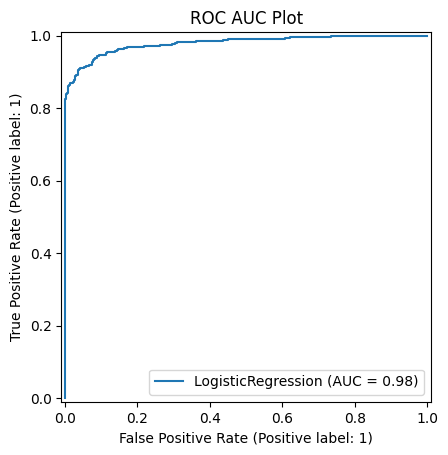

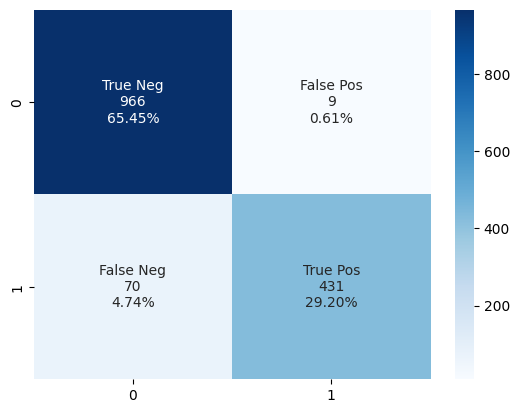

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.98      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476

Evaluating Logistic Regression on dataset 2
Cross Validation Score: 98.53%
ROC AUC Score: 94.40%


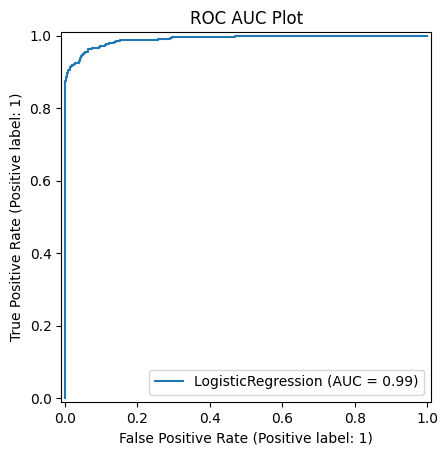

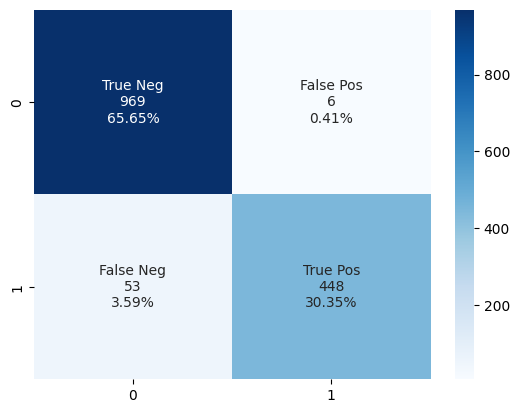

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.99      0.89      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476

Evaluating SVM on dataset 1
Cross Validation Score: 98.25%
ROC AUC Score: 92.00%


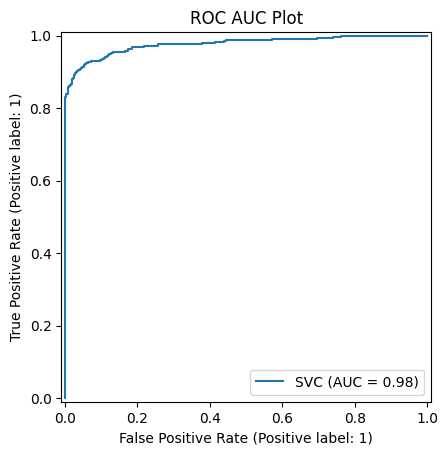

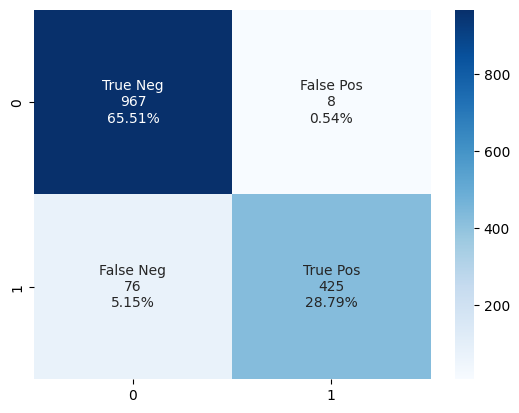

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.98      0.85      0.91       501

    accuracy                           0.94      1476
   macro avg       0.95      0.92      0.93      1476
weighted avg       0.95      0.94      0.94      1476

Evaluating SVM on dataset 2
Cross Validation Score: 98.40%
ROC AUC Score: 94.11%


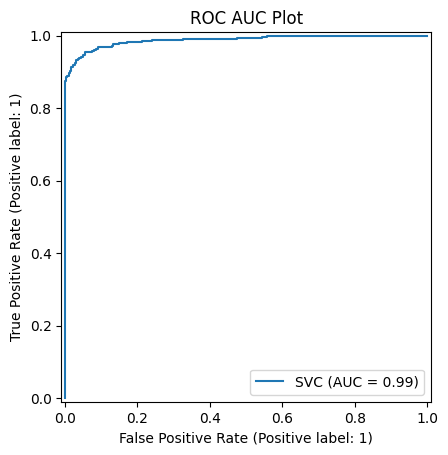

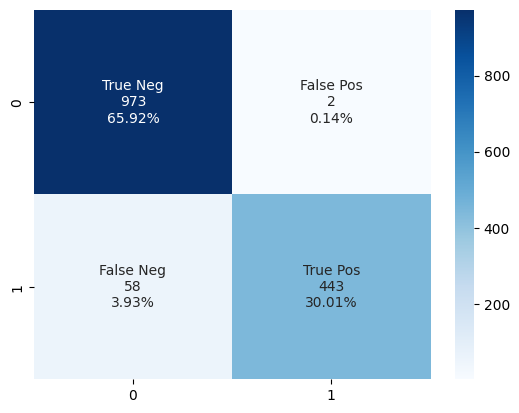

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       1.00      0.88      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476

Evaluating Decision Tree on dataset 1
Cross Validation Score: 97.24%
ROC AUC Score: 92.01%


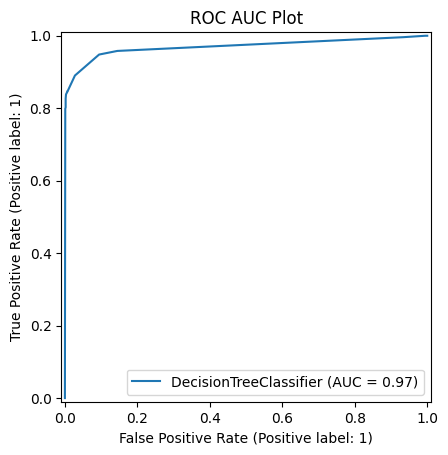

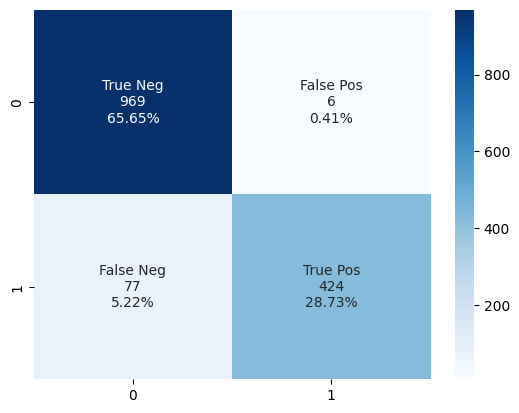

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.99      0.85      0.91       501

    accuracy                           0.94      1476
   macro avg       0.96      0.92      0.93      1476
weighted avg       0.95      0.94      0.94      1476

Evaluating Decision Tree on dataset 2
Cross Validation Score: 96.16%
ROC AUC Score: 94.70%


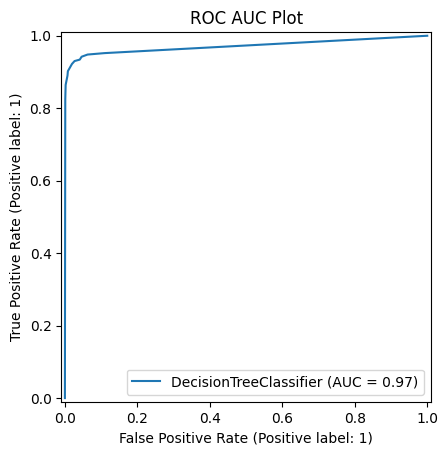

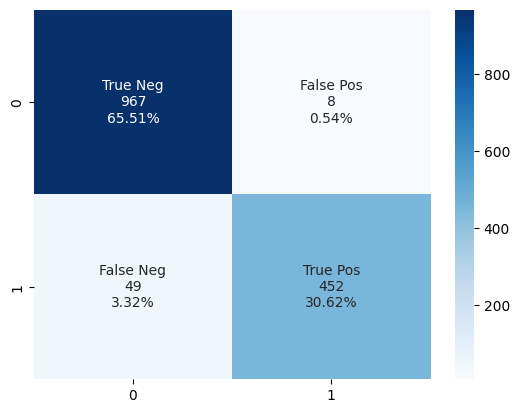

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.98      0.90      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.95      0.96      1476
weighted avg       0.96      0.96      0.96      1476

Evaluating Random Forest on dataset 1
Cross Validation Score: 98.14%
ROC AUC Score: 92.21%


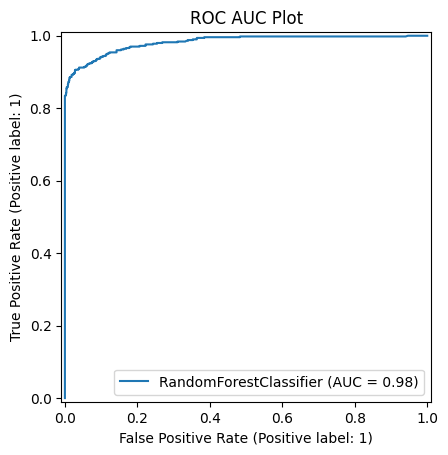

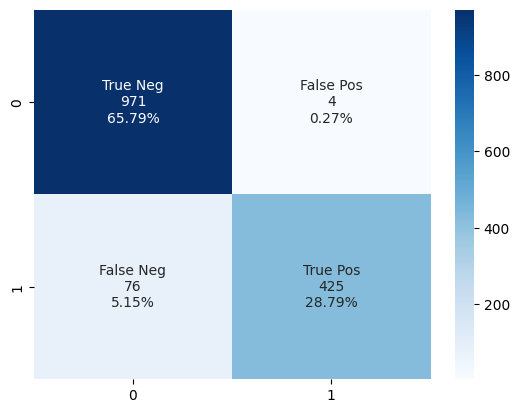

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       0.99      0.85      0.91       501

    accuracy                           0.95      1476
   macro avg       0.96      0.92      0.94      1476
weighted avg       0.95      0.95      0.94      1476

Evaluating Random Forest on dataset 2
Cross Validation Score: 98.05%
ROC AUC Score: 93.66%


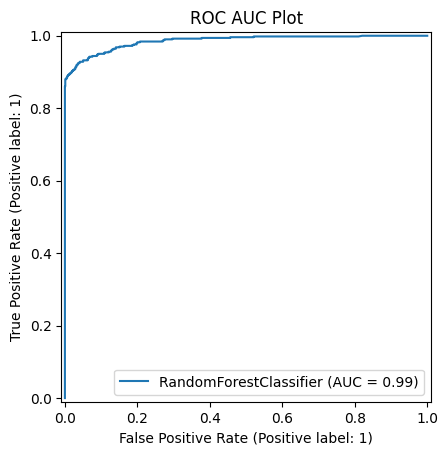

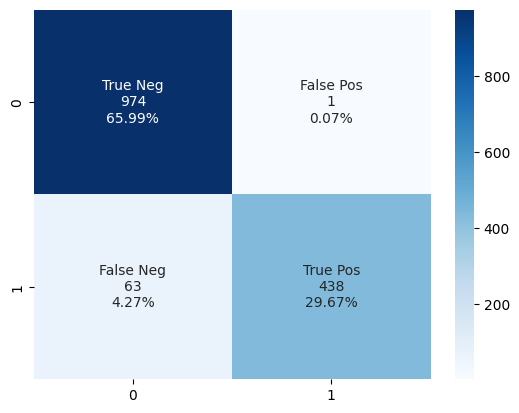

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       1.00      0.87      0.93       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476

Evaluating KNN on dataset 1
Cross Validation Score: 99.38%
ROC AUC Score: 97.82%


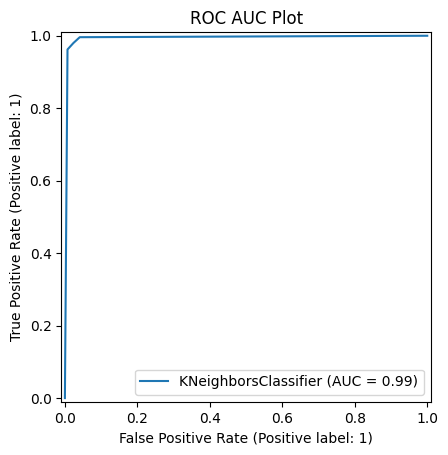

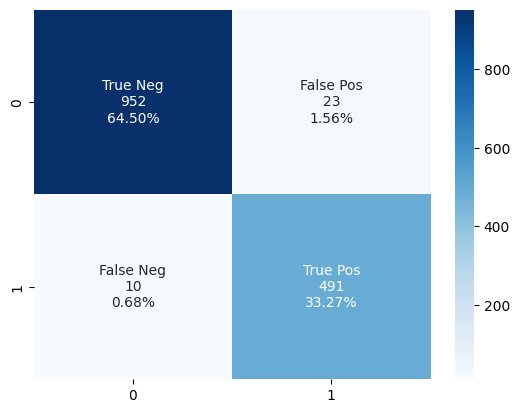

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       975
           1       0.96      0.98      0.97       501

    accuracy                           0.98      1476
   macro avg       0.97      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476

Evaluating KNN on dataset 2
Cross Validation Score: 99.49%
ROC AUC Score: 98.83%


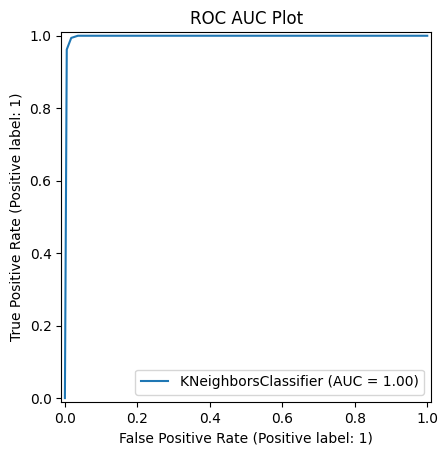

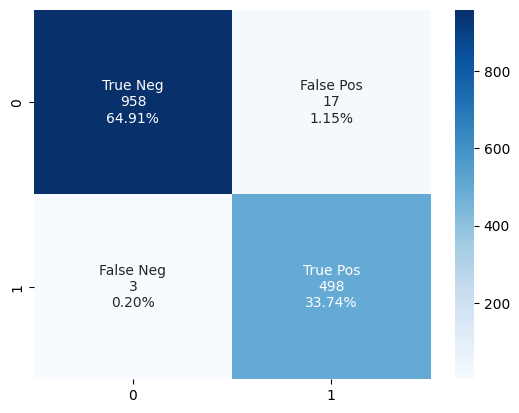

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       975
           1       0.97      0.99      0.98       501

    accuracy                           0.99      1476
   macro avg       0.98      0.99      0.98      1476
weighted avg       0.99      0.99      0.99      1476



In [28]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=0, C=10, penalty='l2'),
    'SVM': SVC(kernel='linear', C=0.1),
    'Decision Tree': DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1),
    'Random Forest': RandomForestClassifier(max_depth=4, random_state=0),
    'KNN': KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)
}

# Evaluate models on both datasets
for name, classifier in classifiers.items():
    print(f"Evaluating {name} on dataset 1")
    evaluate_model(classifier, x_train1, y_train1, x_test1, y_test1)
    evaluate_classification_report(classifier, x_test1, y_test1)
    print(f"Evaluating {name} on dataset 2")
    evaluate_model(classifier, x_train2, y_train2, x_test2, y_test2)
    evaluate_classification_report(classifier, x_test2, y_test2)